### Forecasting the Probability of a Conflict Arising in an African Nation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
conf = pd.read_excel("Africa_1997-2023_Mar31.xlsx")

In [3]:
#Top actors in conflict
top_actors = (conf[['ACTOR1', 'INTER1']]
             .groupby('ACTOR1')
             .agg({'ACTOR1': 'count'})
             .rename(columns={'ACTOR1': 'count(ACTOR1)'})
             .sort_values('count(ACTOR1)', ascending=False)
             .head(10))
top_actors

,count(ACTOR1)
ACTOR1,
Al Shabaab,11640
Protesters (South Africa),9514
Protesters (Algeria),7999
Unidentified Armed Group (Somalia),7280
Rioters (South Africa),7210
Protesters (Tunisia),7179
Protesters (Nigeria),6401
Protesters (Morocco),6362
Protesters (Sudan),5567


In [4]:
#show the top 10 of most conflicting cities according to the number of events registered per location. 
# Create a new DataFrame with unique combinations of country and location
locations_df = conf[['COUNTRY', 'LOCATION']].drop_duplicates()

# Find the top 10 conflicting locations based on the count of their occurrences
top_conflicting_locations = (conf[['LOCATION']]
                             .groupby('LOCATION')
                             .agg({'LOCATION': 'count'})
                             .rename(columns={'LOCATION': 'count(LOCATION)'})
                             .sort_values('count(LOCATION)', ascending=False)
                             .head(10))

# Join the top conflicting locations with the locations_df DataFrame
joined_df = pd.merge(top_conflicting_locations, locations_df, on='LOCATION', how='inner')
joined_df = joined_df.sort_values('count(LOCATION)', ascending=False)
joined_df

,LOCATION,count(LOCATION),COUNTRY
0,Mogadishu,1711,Somalia
1,Khartoum,1633,Sudan
2,Mogadishu - Hodan,1452,Somalia
3,Cape Town,1385,South Africa
4,Harare,1368,Zimbabwe
5,Al Arish,1257,Egypt
6,Cairo,1192,Egypt
7,Tunis,1170,Tunisia
8,Tunis,1170,Egypt
9,Belet Weyne,1132,Somalia


In [5]:
conf['EVENT_TYPE'].unique()

array(['Violence against civilians', 'Battles',
       'Explosions/Remote violence', 'Protests', 'Strategic developments',
       'Riots'], dtype=object)

In [6]:
conf['SUB_EVENT_TYPE'].unique()

array(['Attack', 'Armed clash', 'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Peaceful protest',
       'Change to group/activity', 'Looting/property destruction',
       'Government regains territory', 'Disrupted weapons use',
       'Protest with intervention', 'Violent demonstration',
       'Mob violence', 'Air/drone strike', 'Other', 'Arrests',
       'Excessive force against protesters',
       'Abduction/forced disappearance', 'Suicide bomb', 'Grenade',
       'Non-violent transfer of territory',
       'Headquarters or base established', 'Agreement',
       'Non-state actor overtakes territory', 'Sexual violence',
       'Chemical weapon'], dtype=object)

In [7]:
conf[[ "EVENT_TYPE", "SUB_EVENT_TYPE"]].drop_duplicates()

,EVENT_TYPE,SUB_EVENT_TYPE
0,Violence against civilians,Attack
6,Battles,Armed clash
7,Explosions/Remote violence,Remote explosive/landmine/IED
118,Explosions/Remote violence,Shelling/artillery/missile attack
171,Protests,Peaceful protest
193,Strategic developments,Change to group/activity
205,Strategic developments,Looting/property destruction
216,Battles,Government regains territory
220,Strategic developments,Disrupted weapons use
293,Protests,Protest with intervention


In [8]:
countries = conf.groupby(['COUNTRY'])['COUNTRY'].count().sort_values(axis=0, ascending=False)
countries

COUNTRY
Somalia                                         39620
Nigeria                                         30390
Democratic Republic of Congo                    28607
Sudan                                           19219
South Africa                                    18703
Algeria                                         12199
Egypt                                           11457
Libya                                           11092
Kenya                                           10913
Burundi                                         10186
Tunisia                                          9966
Ethiopia                                         9707
South Sudan                                      8940
Mali                                             8333
Burkina Faso                                     8318
Uganda                                           8278
Cameroon                                         7107
Morocco                                          7090
Central African Repu

## USING EVENT AND SUB EVENT AS TARGET VARIABLE

In [10]:
conf['conflict'] = ((conf['EVENT_TYPE'] == 'Battles') | (conf['EVENT_TYPE'] == 'Explosions/Remote violence') | (conf['EVENT_TYPE'] == 'Violence against civilians') | (conf['EVENT_TYPE'] == 'Strategic developments') | (conf['EVENT_TYPE'] == 'Riots') | (conf['EVENT_TYPE'] == 'Protests')) & ((conf['SUB_EVENT_TYPE'] != 'Peaceful protest') & (conf['SUB_EVENT_TYPE'] != 'Non-violent transfer of territory') & (conf['SUB_EVENT_TYPE'] != 'Non-violent transfer of territory') & (conf['SUB_EVENT_TYPE'] != 'Other') & (conf['SUB_EVENT_TYPE'] != 'Agreement'))

The criteria for identifying a conflict event in this case are based on the EVENT_TYPE and SUB_EVENT_TYPE columns.Specifically, the line checks whether an event belongs to one of events that are commonly associated with conflict

In [11]:
Features = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'INTER1', 'INTER2', 'INTERACTION', 'conflict']

## Somalia Modelling


In [12]:
Somalia=conf.loc[conf['COUNTRY']=='Somalia']
Somalia

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,conflict
181220,SOM28750,1997-02-15,1997,3,Political violence,Violence against civilians,Attack,AIAI: Al-Itihad Al-Islamia,NaN,2,...,-0.360,42.546,1,Aid Worker Security Database,Local partner-Other,'1 INGO international staff killed by Al ittih...,1,NaN,1617662601,True
181221,SOM1,1997-03-31,1997,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Somalia),NaN,3,...,6.770,47.431,1,Xinhua,International,Fighting between Majerten (under colonel abdul...,0,NaN,1582579225,True
181222,SOM2,1997-04-21,1997,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,2.041,45.334,1,Xinhua,International,Two aid workers from Kuwait killed. Perpetrato...,2,NaN,1618571519,True
181223,SOM3,1997-06-12,1997,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,3.328,42.220,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",17,NaN,1625524576,True
181224,SOM4,1997-06-12,1997,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,3.800,42.545,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",16,NaN,1625524576,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220835,SOM39903,2023-03-30,2023,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Al Shabaab,NaN,2,...,2.150,45.116,1,Al Furqaan,National,"On 30 March 2023, an IED planted by Al Shabaab...",2,NaN,1680570816,True
220836,SOM39911,2023-03-31,2023,1,Political violence,Battles,Armed clash,Military Forces of Somaliland (2010-),NaN,1,...,8.477,47.360,2,Caasimada; Goobjoob; Hiiraan (Somalia); Radio ...,National,"On 31 March 2023, Somaliland security forces c...",0,NaN,1680542328,True
220837,SOM39896,2023-03-31,2023,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,3.060,43.604,1,Caasimada; Calamada,Subnational-National,"On 31 March 2023, overnight, Al Shabaab carrie...",15,NaN,1680570816,True
220838,SOM39898,2023-03-31,2023,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,3.117,43.647,1,Calamada,Subnational,"On 31 March 2023, overnight, Al Shabaab carrie...",0,NaN,1680570816,True


In [13]:
Somalia.shape

(39620, 32)

In [14]:
Somalia_crime=Somalia.loc[:, Features]
Somalia_crime

,DISORDER_TYPE,REGION,COUNTRY,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,conflict
181220,Political violence,Eastern Africa,Somalia,Lower Juba,Kismayo,Violence against civilians,Attack,AIAI: Al-Itihad Al-Islamia,2,7,27,True
181221,Political violence,Eastern Africa,Somalia,Mudug,Gaalkacyo,Battles,Armed clash,Unidentified Armed Group (Somalia),3,3,33,True
181222,Political violence,Eastern Africa,Somalia,Banadir,Mogadishu,Violence against civilians,Attack,Unidentified Armed Group (Somalia),3,7,37,True
181223,Political violence,Eastern Africa,Somalia,Gedo,Garbahaarey,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),8,2,28,True
181224,Political violence,Eastern Africa,Somalia,Gedo,Luuq,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),8,2,28,True
...,...,...,...,...,...,...,...,...,...,...,...,...
220835,Political violence,Eastern Africa,Somalia,Lower Shabelle,Afgooye,Explosions/Remote violence,Remote explosive/landmine/IED,Al Shabaab,2,1,12,True
220836,Political violence,Eastern Africa,Somalia,Sool,Laascaanood,Battles,Armed clash,Military Forces of Somaliland (2010-),1,3,13,True
220837,Political violence,Eastern Africa,Somalia,Bay,Makuudo,Battles,Armed clash,Al Shabaab,2,1,12,True
220838,Political violence,Eastern Africa,Somalia,Bay,Baidoa,Battles,Armed clash,Al Shabaab,2,1,12,True


In [15]:
Somalia_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39620 entries, 181220 to 220839
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DISORDER_TYPE   39620 non-null  object
 1   REGION          39620 non-null  object
 2   COUNTRY         39620 non-null  object
 3   ADMIN1          39620 non-null  object
 4   LOCATION        39620 non-null  object
 5   EVENT_TYPE      39620 non-null  object
 6   SUB_EVENT_TYPE  39620 non-null  object
 7   ACTOR1          39620 non-null  object
 8   INTER1          39620 non-null  int64 
 9   INTER2          39620 non-null  int64 
 10  INTERACTION     39620 non-null  int64 
 11  conflict        39620 non-null  bool  
dtypes: bool(1), int64(3), object(8)
memory usage: 3.7+ MB


In [16]:
#To check for missing data 
Somalia_crime.isna().sum()

DISORDER_TYPE     0
REGION            0
COUNTRY           0
ADMIN1            0
LOCATION          0
EVENT_TYPE        0
SUB_EVENT_TYPE    0
ACTOR1            0
INTER1            0
INTER2            0
INTERACTION       0
conflict          0
dtype: int64

### ENCODING
models cannot accept categorical data hence we have to transform categorical data to numerical data

In [17]:
# To select columns that are categorical and numerical
categorical_columns = Somalia_crime.select_dtypes(include=['object', 'category', 'bool']).columns

numerical_columns = [col for col in Somalia_crime.columns if col not in categorical_columns]

In [18]:
categorical_columns

Index(['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION',
       'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'conflict'],
      dtype='object')

In [19]:
numerical_columns

['INTER1', 'INTER2', 'INTERACTION']

In [20]:
Somalia_crime['conflict'].unique()

array([ True, False])

In [21]:
#used the astype() method to convert the boolean column to integer type.
#True is mapped to 1 and False is mapped to 0.
Somalia_crime['conflict'] = Somalia_crime['conflict'].astype(int)


In [22]:
Somalia_crime['conflict'].unique()

array([1, 0])

In [23]:
Somalia_crime['DISORDER_TYPE'].unique()

array(['Political violence', 'Strategic developments', 'Demonstrations',
       'Political violence; Demonstrations'], dtype=object)

In [24]:
Somalia_crime['REGION'].unique()

array(['Eastern Africa'], dtype=object)

In [25]:
Somalia_crime['COUNTRY'].unique()

array(['Somalia'], dtype=object)

In [26]:
Somalia_crime['ADMIN1'].unique()

array(['Lower Juba', 'Mudug', 'Banadir', 'Gedo', 'Bay', 'Lower Shabelle',
       'Togdheer', 'Bakool', 'Hiraan', 'Middle Shabelle',
       'Woqooyi Galbeed', 'Bari', 'Nugaal', 'Galgaduud', 'Sool', 'Awdal',
       'Middle Juba', 'Sanaag'], dtype=object)

In [27]:
Somalia_crime['LOCATION'].unique()

array(['Kismayo', 'Gaalkacyo', 'Mogadishu', ..., 'Baarweyn', 'Turdho',
       'Gariirow'], dtype=object)

In [28]:
Somalia_crime['LOCATION'].nunique()

1645

In [29]:
Somalia_crime['EVENT_TYPE'].unique()

array(['Violence against civilians', 'Battles', 'Strategic developments',
       'Explosions/Remote violence', 'Riots', 'Protests'], dtype=object)

In [30]:
Somalia_crime['SUB_EVENT_TYPE'].unique()

array(['Attack', 'Armed clash', 'Government regains territory',
       'Abduction/forced disappearance', 'Other',
       'Shelling/artillery/missile attack',
       'Non-state actor overtakes territory',
       'Looting/property destruction', 'Remote explosive/landmine/IED',
       'Change to group/activity', 'Suicide bomb',
       'Headquarters or base established', 'Grenade', 'Arrests',
       'Non-violent transfer of territory', 'Air/drone strike',
       'Violent demonstration', 'Peaceful protest',
       'Protest with intervention', 'Mob violence', 'Agreement',
       'Excessive force against protesters', 'Disrupted weapons use',
       'Sexual violence'], dtype=object)

In [31]:
Somalia_crime['SUB_EVENT_TYPE'].nunique()

24

In [32]:
Somalia_crime['ACTOR1'].unique()

array(['AIAI: Al-Itihad Al-Islamia', 'Unidentified Armed Group (Somalia)',
       'Military Forces of Ethiopia (1991-2018)',
       'SNA: Somali National Alliance',
       'Private Security Forces (Somalia)',
       'Unidentified Ethnic Militia (Somalia)',
       'RRA: Rahanweyn Resistance Army', 'SSA: Somali Salvation Alliance',
       'Military Forces of Somaliland (1993-2001)',
       'Islamist Militia (Somalia)', 'SNF: Somali National Front',
       'Military Forces of the United States (1993-2001)',
       'ICU: Islamic Courts Union', 'OLF: Oromo Liberation Front',
       'SSDF: Somali Salvation Democratic Front',
       'Military Forces of Somalia (1998-2000)',
       'ONLA: Ogaden National Liberation Army',
       'Hawadle Clan Militia (Somalia)', 'Digil Salvation Army',
       'Gaaljecel Clan Militia (Somalia)',
       'Saleban Clan Militia (Somalia)', 'Marehan Clan Militia (Somalia)',
       'Wabudan Clan Militia (Somalia)',
       'Unidentified Clan Militia (Somalia)', 'JVA: 

In [33]:
Somalia_crime['ACTOR1'].nunique()

702

In [34]:
Somalia_crime['conflict'].unique()

array([1, 0])

In [35]:
import category_encoders as ce

In [36]:
# Create a target encoder and fit it to the data
encoder = ce.TargetEncoder(cols=['DISORDER_TYPE', 'ADMIN1', 'LOCATION',
       'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1'], smoothing=0.2)
encoder.fit(Somalia_crime, Somalia_crime['conflict'])

# Transform the data using the target encoder
Somalia_encoded = encoder.transform(Somalia_crime)


In [37]:
Somalia_encoded

,DISORDER_TYPE,REGION,COUNTRY,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,conflict
181220,1.0,Eastern Africa,Somalia,0.962861,0.956483,1.0,1.0,0.936774,2,7,27,1
181221,1.0,Eastern Africa,Somalia,0.905195,0.902829,1.0,1.0,0.995443,3,3,33,1
181222,1.0,Eastern Africa,Somalia,0.968264,0.926359,1.0,1.0,0.995443,3,7,37,1
181223,1.0,Eastern Africa,Somalia,0.916621,0.841860,1.0,1.0,0.935567,8,2,28,1
181224,1.0,Eastern Africa,Somalia,0.916621,0.919753,1.0,1.0,0.935567,8,2,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220835,1.0,Eastern Africa,Somalia,0.973063,0.974708,1.0,1.0,0.982516,2,1,12,1
220836,1.0,Eastern Africa,Somalia,0.859626,0.872500,1.0,1.0,0.947826,1,3,13,1
220837,1.0,Eastern Africa,Somalia,0.944205,1.000000,1.0,1.0,0.982516,2,1,12,1
220838,1.0,Eastern Africa,Somalia,0.944205,0.944808,1.0,1.0,0.982516,2,1,12,1


In [38]:
Clean_somalia= Somalia_encoded.drop(columns=['REGION', 'COUNTRY'])

In [39]:
Clean_somalia

,DISORDER_TYPE,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,conflict
181220,1.0,0.962861,0.956483,1.0,1.0,0.936774,2,7,27,1
181221,1.0,0.905195,0.902829,1.0,1.0,0.995443,3,3,33,1
181222,1.0,0.968264,0.926359,1.0,1.0,0.995443,3,7,37,1
181223,1.0,0.916621,0.841860,1.0,1.0,0.935567,8,2,28,1
181224,1.0,0.916621,0.919753,1.0,1.0,0.935567,8,2,28,1
...,...,...,...,...,...,...,...,...,...,...
220835,1.0,0.973063,0.974708,1.0,1.0,0.982516,2,1,12,1
220836,1.0,0.859626,0.872500,1.0,1.0,0.947826,1,3,13,1
220837,1.0,0.944205,1.000000,1.0,1.0,0.982516,2,1,12,1
220838,1.0,0.944205,0.944808,1.0,1.0,0.982516,2,1,12,1


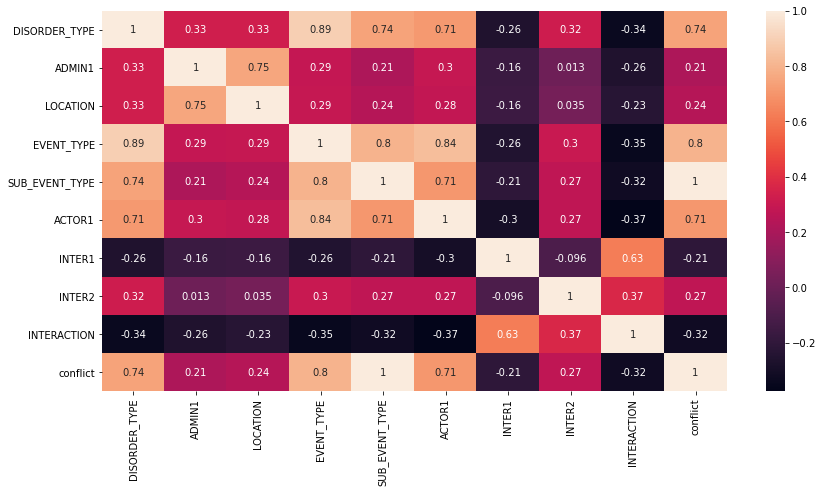

In [40]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.heatmap(Clean_somalia.corr(),annot=True)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge

In [42]:
x = Clean_somalia.drop(columns=['conflict'])
y = Clean_somalia['conflict']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31696, 9), (7924, 9), (31696,), (7924,))

In [45]:
models = {'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
          'RandomForestRegressor': RandomForestRegressor(random_state=42),
         'LinearRegression': LinearRegression(),
          'ElasticNet': ElasticNet(alpha=0.001, random_state=42),
          'Lasso': Lasso(alpha=0.001, random_state=42), 
          'Ridge': Ridge(alpha=0.001, random_state=42),
         'XGBRegressor': XGBRegressor(eval_metric=r2_score)}


In [46]:
def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [47]:
def score(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rss = np.sum(np.square(y_test-predictions))
    
    print('RMSE:', rmse)
    print('R-Squared:', r2)
    print('MSE:', mse)
    print('RSS', rss)
    print('MAE:', mae)
    print()
    return [r2, mae, mse, rmse, rss]

In [48]:
scoring = pd.DataFrame()
scoring['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [49]:

for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X_train, y_train)
    results = score(model, X_test, y_test)
    scoring[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 6.349053296565586e-06
R-Squared: 0.9999999992943811
MSE: 4.031047776263034e-11
RSS 3.194202257910828e-07
MAE: 3.104715841893047e-06

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.0
R-Squared: 1.0
MSE: 0.0
RSS 0.0
MAE: 0.0

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 3.122828817242817e-14
R-Squared: 1.0
MSE: 9.75205982180217e-28
RSS 7.72753220279604e-24
MAE: 1.9100264528346276e-14

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.0045422140345429424
R-Squared: 0.9996388501660728
MSE: 2.0631708335598878e-05
RSS 0.16348565685128552
MAE: 0.0024488873512852846

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.004450551739884555
R-Squared: 0.9996532791661865
MSE: 1.980741078938944e-05
RSS 0.15695392309512193
MAE: 0.002408618061491566

Performance of Ridge on Test:
Test set:
****************
RMSE: 2.21331829665

In [50]:
scoring

,Metric,GradientBoostingRegressor,RandomForestRegressor,LinearRegression,ElasticNet,Lasso,Ridge,XGBRegressor
0,R2_score,1.000000e+00,1.0,1.000000e+00,0.999639,0.999653,1.000000e+00,1.000000e+00
1,MAE,3.104716e-06,0.0,1.910026e-14,0.002449,0.002409,8.287777e-08,1.936539e-06
2,MSE,4.031048e-11,0.0,9.752060e-28,0.000021,0.000020,4.898778e-14,1.526676e-11
3,RMSE,6.349053e-06,0.0,3.122829e-14,0.004542,0.004451,2.213318e-07,3.907270e-06
4,RSS,3.194202e-07,0.0,7.727532e-24,0.163486,0.156954,3.881792e-10,1.209738e-07


## USING FATALITIES AS THE TARGET VARIABLE

In [51]:
# Define the target variable based on fatalities
conf['Target'] = conf['FATALITIES'] > 0

In [52]:
conf.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,conflict,Target
0,ALG1,1997-01-01,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,NaN,1582579226,True,True
1,ALG2,1997-01-02,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,NaN,1582579226,True,True
2,ALG3,1997-01-03,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,NaN,1582579226,True,True
3,ALG4,1997-01-04,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,NaN,1582579226,True,True
4,ALG5,1997-01-05,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,NaN,1582579226,True,True


In [53]:
new_conf = conf.drop(columns=['conflict'])

In [55]:
new_conf.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,Target
0,ALG1,1997-01-01,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,NaN,1582579226,True
1,ALG2,1997-01-02,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,NaN,1582579226,True
2,ALG3,1997-01-03,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,NaN,1582579226,True
3,ALG4,1997-01-04,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,NaN,1582579226,True
4,ALG5,1997-01-05,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,NaN,1582579226,True


In [61]:
Features_2 = ['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'INTER1', 'INTER2', 'INTERACTION', 'Target']

### Somalia Modelling 2

In [62]:
New_Somalia=new_conf.loc[new_conf['COUNTRY']=='Somalia']
New_Somalia

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP,Target
181220,SOM28750,1997-02-15,1997,3,Political violence,Violence against civilians,Attack,AIAI: Al-Itihad Al-Islamia,NaN,2,...,-0.360,42.546,1,Aid Worker Security Database,Local partner-Other,'1 INGO international staff killed by Al ittih...,1,NaN,1617662601,True
181221,SOM1,1997-03-31,1997,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Somalia),NaN,3,...,6.770,47.431,1,Xinhua,International,Fighting between Majerten (under colonel abdul...,0,NaN,1582579225,False
181222,SOM2,1997-04-21,1997,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,2.041,45.334,1,Xinhua,International,Two aid workers from Kuwait killed. Perpetrato...,2,NaN,1618571519,True
181223,SOM3,1997-06-12,1997,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,3.328,42.220,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",17,NaN,1625524576,True
181224,SOM4,1997-06-12,1997,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,3.800,42.545,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",16,NaN,1625524576,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220835,SOM39903,2023-03-30,2023,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,Al Shabaab,NaN,2,...,2.150,45.116,1,Al Furqaan,National,"On 30 March 2023, an IED planted by Al Shabaab...",2,NaN,1680570816,True
220836,SOM39911,2023-03-31,2023,1,Political violence,Battles,Armed clash,Military Forces of Somaliland (2010-),NaN,1,...,8.477,47.360,2,Caasimada; Goobjoob; Hiiraan (Somalia); Radio ...,National,"On 31 March 2023, Somaliland security forces c...",0,NaN,1680542328,False
220837,SOM39896,2023-03-31,2023,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,3.060,43.604,1,Caasimada; Calamada,Subnational-National,"On 31 March 2023, overnight, Al Shabaab carrie...",15,NaN,1680570816,True
220838,SOM39898,2023-03-31,2023,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,3.117,43.647,1,Calamada,Subnational,"On 31 March 2023, overnight, Al Shabaab carrie...",0,NaN,1680570816,False


In [63]:
Somalia_conf=New_Somalia.loc[:, Features_2]
Somalia_conf

,DISORDER_TYPE,REGION,COUNTRY,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,Target
181220,Political violence,Eastern Africa,Somalia,Lower Juba,Kismayo,Violence against civilians,Attack,AIAI: Al-Itihad Al-Islamia,2,7,27,True
181221,Political violence,Eastern Africa,Somalia,Mudug,Gaalkacyo,Battles,Armed clash,Unidentified Armed Group (Somalia),3,3,33,False
181222,Political violence,Eastern Africa,Somalia,Banadir,Mogadishu,Violence against civilians,Attack,Unidentified Armed Group (Somalia),3,7,37,True
181223,Political violence,Eastern Africa,Somalia,Gedo,Garbahaarey,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),8,2,28,True
181224,Political violence,Eastern Africa,Somalia,Gedo,Luuq,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),8,2,28,True
...,...,...,...,...,...,...,...,...,...,...,...,...
220835,Political violence,Eastern Africa,Somalia,Lower Shabelle,Afgooye,Explosions/Remote violence,Remote explosive/landmine/IED,Al Shabaab,2,1,12,True
220836,Political violence,Eastern Africa,Somalia,Sool,Laascaanood,Battles,Armed clash,Military Forces of Somaliland (2010-),1,3,13,False
220837,Political violence,Eastern Africa,Somalia,Bay,Makuudo,Battles,Armed clash,Al Shabaab,2,1,12,True
220838,Political violence,Eastern Africa,Somalia,Bay,Baidoa,Battles,Armed clash,Al Shabaab,2,1,12,False


### ENCODING
models cannot accept categorical data hence we have to transform categorical data to numerical data

In [64]:
# To select columns that are categorical and numerical
categorical_columns = Somalia_conf.select_dtypes(include=['object', 'category', 'bool']).columns

numerical_columns = [col for col in Somalia_conf.columns if col not in categorical_columns]

In [65]:
categorical_columns

Index(['DISORDER_TYPE', 'REGION', 'COUNTRY', 'ADMIN1', 'LOCATION',
       'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'Target'],
      dtype='object')

In [66]:
numerical_columns

['INTER1', 'INTER2', 'INTERACTION']

In [67]:
#used the astype() method to convert the boolean column to integer type.
#True is mapped to 1 and False is mapped to 0.
Somalia_conf['Target'] = Somalia_conf['Target'].astype(int)


In [69]:
Somalia_conf['Target'].unique()

array([1, 0])

In [70]:
# Create a target encoder and fit it to the data
# Region and country not included since its the same value in the entire somalia dataset
encoder2 = ce.TargetEncoder(cols=['DISORDER_TYPE', 'ADMIN1', 'LOCATION',
       'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1'], smoothing=0.2)
encoder2.fit(Somalia_conf, Somalia_conf['Target'])

# Transform the data using the target encoder
Somalia_encoded2 = encoder2.transform(Somalia_conf)

In [71]:
Somalia_encoded2

,DISORDER_TYPE,REGION,COUNTRY,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,Target
181220,0.471741,Eastern Africa,Somalia,0.381735,0.448490,0.657304,0.707705,0.419308,2,7,27,1
181221,0.471741,Eastern Africa,Somalia,0.514935,0.489545,0.425555,0.424121,0.462303,3,3,33,0
181222,0.471741,Eastern Africa,Somalia,0.486088,0.504383,0.657304,0.707705,0.462303,3,7,37,1
181223,0.471741,Eastern Africa,Somalia,0.360218,0.279070,0.425555,0.450758,0.360825,8,2,28,1
181224,0.471741,Eastern Africa,Somalia,0.360218,0.290123,0.425555,0.450758,0.360825,8,2,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...
220835,0.471741,Eastern Africa,Somalia,0.378938,0.461089,0.405457,0.452790,0.408075,2,1,12,1
220836,0.471741,Eastern Africa,Somalia,0.311497,0.340000,0.425555,0.424121,0.317391,1,3,13,0
220837,0.471741,Eastern Africa,Somalia,0.421455,0.166667,0.425555,0.424121,0.408075,2,1,12,1
220838,0.471741,Eastern Africa,Somalia,0.421455,0.409729,0.425555,0.424121,0.408075,2,1,12,0


In [73]:
Clean_somalia2= Somalia_encoded2.drop(columns=['REGION', 'COUNTRY'])
Clean_somalia2

,DISORDER_TYPE,ADMIN1,LOCATION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,INTER1,INTER2,INTERACTION,Target
181220,0.471741,0.381735,0.448490,0.657304,0.707705,0.419308,2,7,27,1
181221,0.471741,0.514935,0.489545,0.425555,0.424121,0.462303,3,3,33,0
181222,0.471741,0.486088,0.504383,0.657304,0.707705,0.462303,3,7,37,1
181223,0.471741,0.360218,0.279070,0.425555,0.450758,0.360825,8,2,28,1
181224,0.471741,0.360218,0.290123,0.425555,0.450758,0.360825,8,2,28,1
...,...,...,...,...,...,...,...,...,...,...
220835,0.471741,0.378938,0.461089,0.405457,0.452790,0.408075,2,1,12,1
220836,0.471741,0.311497,0.340000,0.425555,0.424121,0.317391,1,3,13,0
220837,0.471741,0.421455,0.166667,0.425555,0.424121,0.408075,2,1,12,1
220838,0.471741,0.421455,0.409729,0.425555,0.424121,0.408075,2,1,12,0


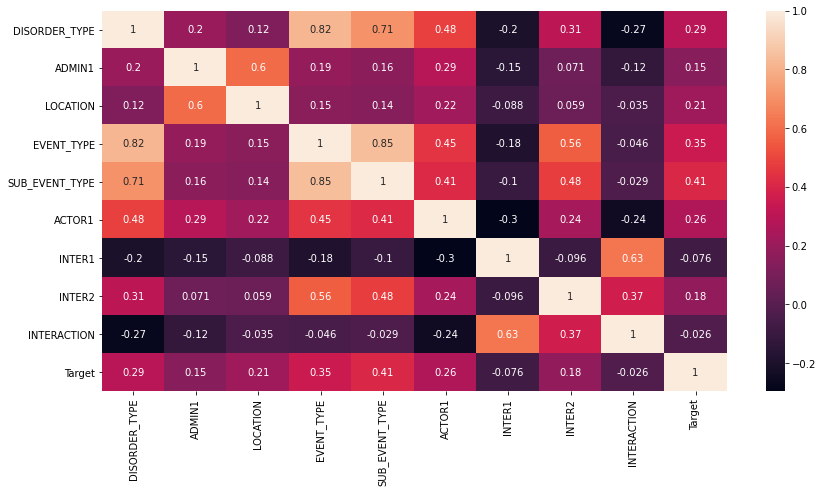

In [74]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.heatmap(Clean_somalia2.corr(),annot=True)

In [75]:
x = Clean_somalia2.drop(columns=['Target'])
y = Clean_somalia2['Target']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31696, 9), (7924, 9), (31696,), (7924,))

In [78]:
models = {'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
          'RandomForestRegressor': RandomForestRegressor(random_state=42),
         'LinearRegression': LinearRegression(),
          'ElasticNet': ElasticNet(alpha=0.001, random_state=42),
          'Lasso': Lasso(alpha=0.001, random_state=42), 
          'Ridge': Ridge(alpha=0.001, random_state=42),
         'XGBRegressor': XGBRegressor(eval_metric=r2_score)}


In [79]:
def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [80]:
def score(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rss = np.sum(np.square(y_test-predictions))
    
    print('RMSE:', rmse)
    print('R-Squared:', r2)
    print('MSE:', mse)
    print('RSS', rss)
    print('MAE:', mae)
    print()
    return [r2, mae, mse, rmse, rss]

In [81]:
scoring2 = pd.DataFrame()
scoring2['Metric'] = ['R2_score', 'MAE', 'MSE', 'RMSE', 'RSS']

In [82]:
for name, func in models.items():
    print(f'Performance of {name} on Test:')
    print('=='*24)
    print ('Test set:')
    print("**"*8)
    
    model = train(func, X_train, y_train)
    results = score(model, X_test, y_test)
    scoring2[name] = results

Performance of GradientBoostingRegressor on Test:
Test set:
****************
RMSE: 0.42945618539755653
R-Squared: 0.2400816849266456
MSE: 0.18443261517622045
RSS 1461.4440426563708
MAE: 0.37374862544710613

Performance of RandomForestRegressor on Test:
Test set:
****************
RMSE: 0.4428986970418559
R-Squared: 0.1917643685603434
MSE: 0.19615925584137367
RSS 1554.365943287045
MAE: 0.34213907260068577

Performance of LinearRegression on Test:
Test set:
****************
RMSE: 0.44134844880371404
R-Squared: 0.19741249096994318
MSE: 0.1947884532614446
RSS 1543.503703643687
MAE: 0.39890256541155433

Performance of ElasticNet on Test:
Test set:
****************
RMSE: 0.4417468131342664
R-Squared: 0.1959629944171718
MSE: 0.19514024691428047
RSS 1546.2913165487585
MAE: 0.4018896437670605

Performance of Lasso on Test:
Test set:
****************
RMSE: 0.4418563804132601
R-Squared: 0.1955640913821418
MSE: 0.1952370609119076
RSS 1547.0584706659558
MAE: 0.40202369834248824

Performance of Ridge